In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

In [2]:
#carregar os dados do arquivo txt
data = pd.read_csv('arca_178_2017_2020.txt', delimiter='\t', header=None)

In [3]:
data

,0,1,2
0,01/08/2017,01:00,1.371
1,01/08/2017,02:00,1.310
2,01/08/2017,03:00,1.150
3,01/08/2017,04:00,1.125
4,01/08/2017,05:00,1.183
...,...,...,...
29970,31/12/2020,19:00,1.499
29971,31/12/2020,20:00,1.321
29972,31/12/2020,21:00,1.132
29973,31/12/2020,22:00,1.028


In [4]:
data.columns = ['dt', 'hr', 'nivel']

In [5]:
# Concatenando as colunas 'dt' e 'hr' e convertendo para o formato datetime
data['dt_hr'] = pd.to_datetime(data['dt'] + ' ' + data['hr'], format='%d/%m/%Y %H:%M')


In [6]:
# Converter a coluna 'dt_hrs' para o índice do DataFrame, se ainda não estiver
data.set_index('dt_hr', inplace=True)

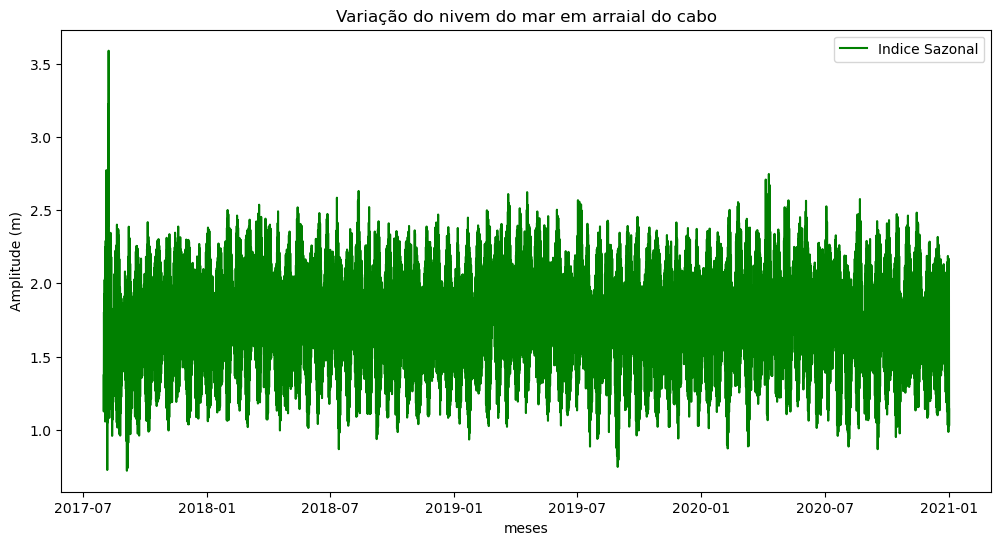

In [7]:
# Plotagem do gráfico
plt.figure(figsize=(12, 6))
plt.plot(data['nivel'], 'g', label='Indice Sazonal')
plt.xlabel('meses')
plt.ylabel('Amplitude (m)')
plt.title('Variação do nivem do mar em arraial do cabo')
plt.legend()

# Mostrar o gráfico
plt.show()

In [8]:
#aplicar alguns filtros de media e o desvio padrão da coluna Nivel do mar
#calcular a média
mean_level = data['nivel'].mean()
#calcular o desvio padrão
std_desv = data['nivel'].std()

#definir os limites superior e inferior para eliminar os outlier
limite_superior = mean_level + 2.5 * std_desv
limite_inferior = mean_level - 2.5 * std_desv

#filtrar o dataframe para remover outliers
data = data[(data['nivel'] >= limite_inferior) & (data['nivel'] <= limite_superior)]


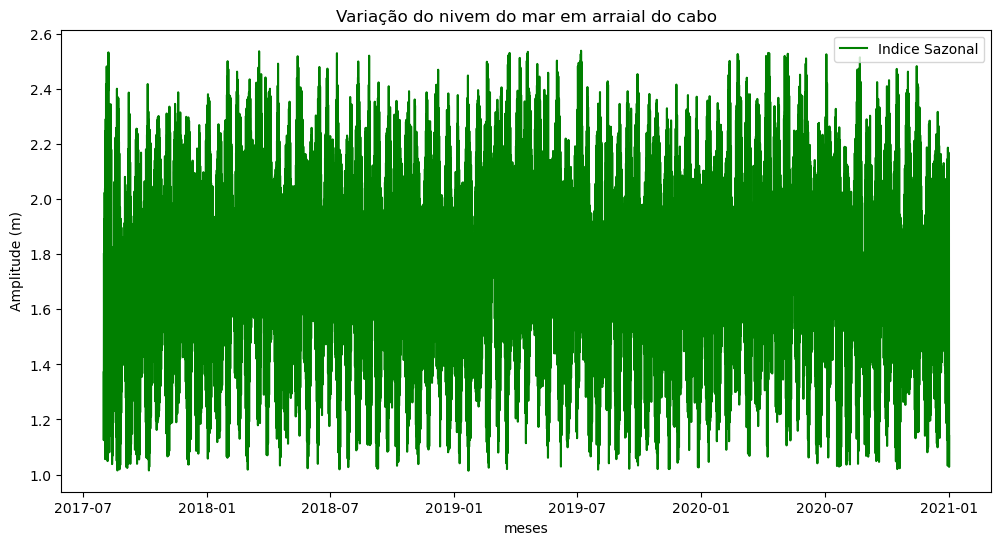

In [9]:
# Plotagem do gráfico
plt.figure(figsize=(12, 6))
plt.plot(data['nivel'], 'g', label='Indice Sazonal')
plt.xlabel('meses')
plt.ylabel('Amplitude (m)')
plt.title('Variação do nivem do mar em arraial do cabo')
plt.legend()

# Mostrar o gráfico
plt.show()

In [10]:
# Criar uma cópia do DataFrame para evitar warnings
data = data.copy()

# Calcula a média da coluna 'mare'
media_mare =  1.507

# Subtrai a média de todos os valores na coluna 'mare' e adiciona como uma nova coluna
data['alt_zero'] = data['nivel'] - media_mare
data['alt_zero'] = data['alt_zero'] * 100

# Exibe os primeiros valores do DataFrame com as colunas originais e a 'mare' centralizada
data

,dt,hr,nivel,alt_zero
dt_hr,,,,
2017-08-01 01:00:00,01/08/2017,01:00,1.371,-13.6
2017-08-01 02:00:00,01/08/2017,02:00,1.310,-19.7
2017-08-01 03:00:00,01/08/2017,03:00,1.150,-35.7
2017-08-01 04:00:00,01/08/2017,04:00,1.125,-38.2
2017-08-01 05:00:00,01/08/2017,05:00,1.183,-32.4
...,...,...,...,...
2020-12-31 19:00:00,31/12/2020,19:00,1.499,-0.8
2020-12-31 20:00:00,31/12/2020,20:00,1.321,-18.6
2020-12-31 21:00:00,31/12/2020,21:00,1.132,-37.5


In [11]:
# Reinicie o índice para transformar a coluna dt_hr em uma coluna regular
data.reset_index(inplace=True)

# Renomeie a coluna do índice para 'dt_hr' se necessário
data.rename(columns={'index': 'dt_hr'}, inplace=True)

# Agora, a coluna dt_hr é uma coluna regular do DataFrame
data

,dt_hr,dt,hr,nivel,alt_zero
0,2017-08-01 01:00:00,01/08/2017,01:00,1.371,-13.6
1,2017-08-01 02:00:00,01/08/2017,02:00,1.310,-19.7
2,2017-08-01 03:00:00,01/08/2017,03:00,1.150,-35.7
3,2017-08-01 04:00:00,01/08/2017,04:00,1.125,-38.2
4,2017-08-01 05:00:00,01/08/2017,05:00,1.183,-32.4
...,...,...,...,...,...
29789,2020-12-31 19:00:00,31/12/2020,19:00,1.499,-0.8
29790,2020-12-31 20:00:00,31/12/2020,20:00,1.321,-18.6
29791,2020-12-31 21:00:00,31/12/2020,21:00,1.132,-37.5
29792,2020-12-31 22:00:00,31/12/2020,22:00,1.028,-47.9


In [12]:
# Converter a coluna 'data_hora' para o índice do DataFrame, se ainda não estiver
data.set_index('dt_hr', inplace=True)

# Calcular a média mensal da coluna 'alt_zero' corresponde a altura após a subtração da 
media_mensal = data['alt_zero'].resample('M').mean()

# Exibir a média mensal
print(media_mensal)

dt_hr
2017-08-31    17.895898
2017-09-30    13.846790
2017-10-31    23.521833
2017-11-30    28.065042
2017-12-31    23.436559
2018-01-31    25.441263
2018-02-28    32.374107
2018-03-31    35.500403
2018-04-30    23.670932
2018-05-31    30.004441
2018-06-30    33.652222
2018-07-31    29.016396
2018-08-31    28.616168
2018-09-30    25.915877
2018-10-31    25.382210
2018-11-30    23.027361
2018-12-31    28.595699
2019-01-31    21.474865
2019-02-28    33.386310
2019-03-31    32.495682
2019-04-30    36.802503
2019-05-31    32.611559
2019-06-30    26.017639
2019-07-31    28.529508
2019-08-31    24.528121
2019-09-30    25.781704
2019-10-31    22.436425
2019-11-30    21.673398
2019-12-31    26.587366
2020-01-31    29.189637
2020-02-29    29.985569
2020-03-31    27.401764
2020-04-30    31.086060
2020-05-31    35.789757
2020-06-30    28.666574
2020-07-31    29.034054
2020-08-31    22.584332
2020-09-30    24.763217
2020-10-31    22.386119
2020-11-30    24.714861
2020-12-31    25.387483
Freq: ME, 

C:\Users\labdi\AppData\Local\Temp\ipykernel_5884\3949286555.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  media_mensal = data['alt_zero'].resample('M').mean()


In [13]:
# Cria um novo DataFrame com as médias mensais de'data_hora' e alt_zero

df = pd.DataFrame({
    'dt_hr': media_mensal.index,
    'alt_zero': media_mensal.values
})

# Exibe o novo DataFrame com as médias mensais
print(df)

        dt_hr   alt_zero
0  2017-08-31  17.895898
1  2017-09-30  13.846790
2  2017-10-31  23.521833
3  2017-11-30  28.065042
4  2017-12-31  23.436559
5  2018-01-31  25.441263
6  2018-02-28  32.374107
7  2018-03-31  35.500403
8  2018-04-30  23.670932
9  2018-05-31  30.004441
10 2018-06-30  33.652222
11 2018-07-31  29.016396
12 2018-08-31  28.616168
13 2018-09-30  25.915877
14 2018-10-31  25.382210
15 2018-11-30  23.027361
16 2018-12-31  28.595699
17 2019-01-31  21.474865
18 2019-02-28  33.386310
19 2019-03-31  32.495682
20 2019-04-30  36.802503
21 2019-05-31  32.611559
22 2019-06-30  26.017639
23 2019-07-31  28.529508
24 2019-08-31  24.528121
25 2019-09-30  25.781704
26 2019-10-31  22.436425
27 2019-11-30  21.673398
28 2019-12-31  26.587366
29 2020-01-31  29.189637
30 2020-02-29  29.985569
31 2020-03-31  27.401764
32 2020-04-30  31.086060
33 2020-05-31  35.789757
34 2020-06-30  28.666574
35 2020-07-31  29.034054
36 2020-08-31  22.584332
37 2020-09-30  24.763217
38 2020-10-31  22.386119


In [14]:
# Construindo a matriz A0 para regressão linear
A0 = np.column_stack([np.ones(len(df)), df['dt_hr'].apply(lambda x: x.to_julian_date())])
x0 = np.linalg.lstsq(A0, df['alt_zero'], rcond=None)[0]
alt_est = A0.dot(x0) #tendencia estimada

In [16]:
import pandas as pd
from scipy.stats import linregress

# Convertendo a coluna de data_hora para o ano
df['ano'] = df['dt_hr'].dt.year

# Calculando a regressão linear
slope, intercept, r_value, p_value, std_err = linregress(df['ano'], df['alt_zero'])

# Tendência por ano (inclinação da reta)
tendencia_por_ano = slope

# Grau de incerteza
incerteza = std_err


print("Tendência por ano:", tendencia_por_ano)
print("Incerteza:", incerteza)

Tendência por ano: 1.1381697195892437
Incerteza: 0.7376549479326254


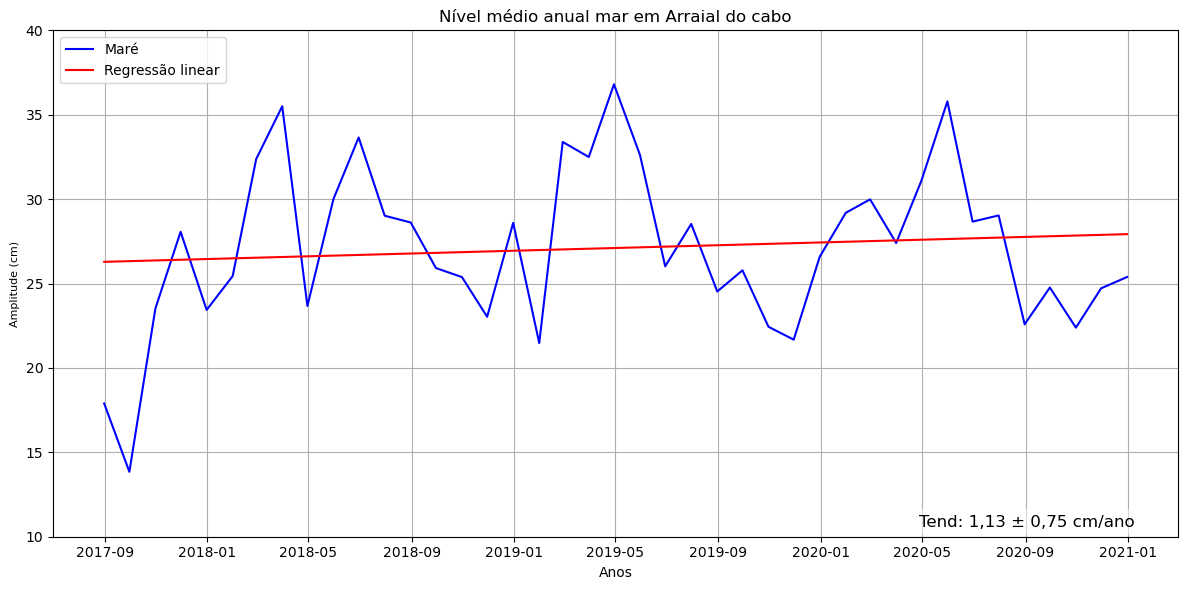

In [26]:
# Importe a biblioteca Matplotlib
import matplotlib.pyplot as plt

# Resolução desejada
dpi = 300
Trend = '1,13 ± 0,75'  # Defina o valor da tendência

# Plotagem do gráfico
plt.figure(figsize=(12, 6))
#plt.plot(df['dt_hr'], df['alt_zero']), 'b', label='Maré')
plt.plot(df['dt_hr'], df['alt_zero'], 'b', label='Maré')

#plt.plot(df_mensal['data_hora'], df_mensal['nivel_do_mar_interp'], linestyle='--', color='b', label='Maré')  # Corrigido aqui
#plt.plot(df_mensal['data_hora'], tendencia, 'r', label='Regressão linear', 'lineWidth', 1.5)
plt.plot(df['dt_hr'], alt_est, 'r', label='Regressão linear', linewidth=1.5)


# Adicione o valor da tendência linear abaixo da legenda
plt.text(0.77, 0.02, f'Tend: {Trend} cm/ano', transform=plt.gca().transAxes, fontsize=12, bbox=dict(facecolor='w', edgecolor='none', alpha=0.5))

plt.title('Nível médio anual mar em Arraial do cabo', fontsize=12)
plt.legend(loc='upper left')
plt.xlabel('Anos')
plt.ylabel('Amplitude (cm)', fontsize=8)
plt.grid(True)
# Define os limites e os marcadores dos eixos y
plt.ylim(20 , 40)
plt.yticks(range(10, 41, 5))
# Define o formato do eixo x para mostrar anos e meses (AAAA, MM)
# Salvar a figura
#plt.savefig('D:/graficos/Tendencia/nivel_medio_anual_Arraial.png', dpi=dpi)  # Salva a figura com a resolução especificada


plt.tight_layout()
plt.show()

In [28]:
df.to_csv('D:/Sazonalidade/dataframe_sazonalidades/tend_arraial.csv', index=False)

In [27]:
import numpy as np

# Calcule o desvio padrão da série de dados 'alt_zero'
desvio = np.std(df['alt_zero'])

# Exiba o desvio padrão
print("Desvio padrão:", desvio)

Desvio padrão: 4.77752751760142


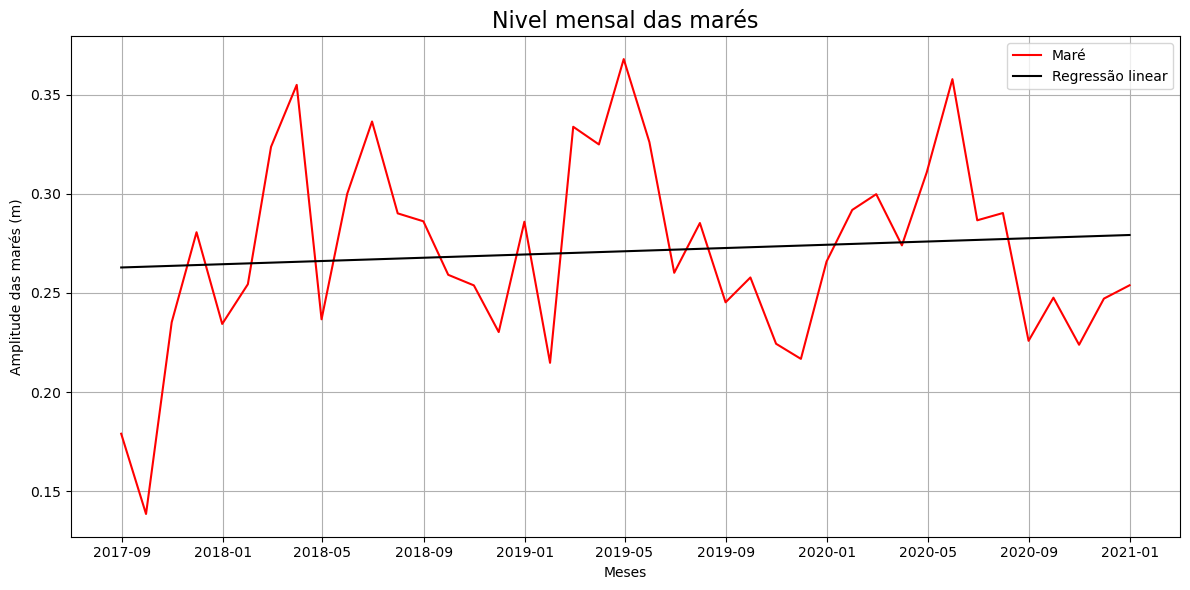

In [15]:
# Plotagem do gráfico
plt.figure(figsize=(12, 6))
plt.plot(df['dt_hr'], df['alt_zero'], 'r', label='Maré')
plt.plot(df['dt_hr'], alt_est, 'k', label='Regressão linear')

plt.title('Nivel mensal das marés', fontsize=16)
plt.legend(loc='best')
plt.xlabel('Meses')
plt.ylabel('Amplitude das marés (m)')
plt.grid(True)

plt.tight_layout()

In [16]:
# Calcular a média móvel de 12 períodos com janelas centradas
df['Media_Movel_12'] = df['alt_zero'].rolling(window=12, center=True).sum()

In [17]:
df['Media_Movel_2_Centrada'] = df['Media_Movel_12'].rolling(window=2, center=True).sum()

In [18]:
# Calculando a média móvel centrada dividida por 24
df['Media_Movel_Centrada'] = df['Media_Movel_2_Centrada'] / 24

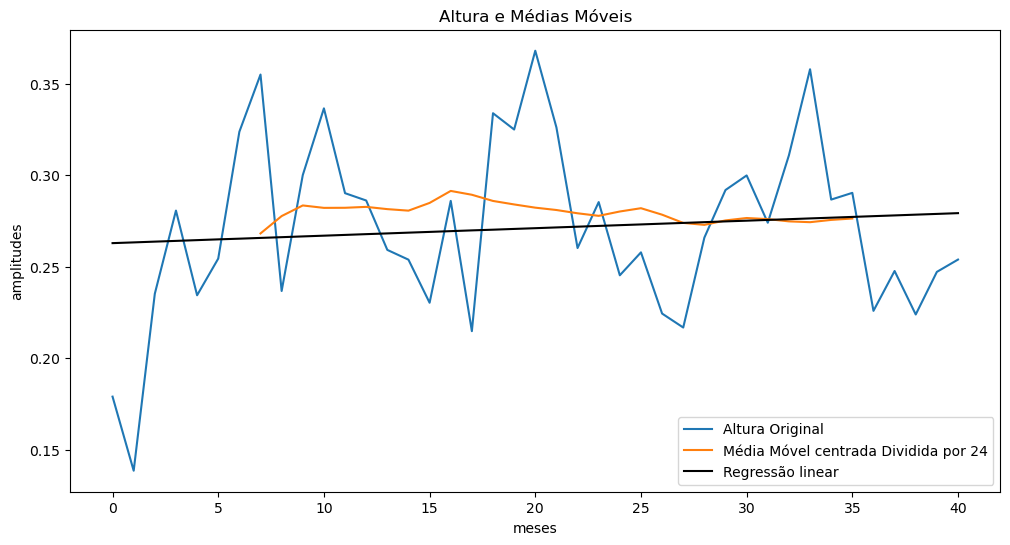

In [19]:
# Plotar as alturas originais
plt.figure(figsize =(12, 6))
plt.plot(df['alt_zero'], label='Altura Original')

# Plotar a média móvel de período 12
#plt.plot(data['Media_Movel_12'], label='Média Móvel de 12 Períodos')

# Plotar a média móvel centrada dividida por 24
#plt.plot(data['Media_Movel_2_Centrada'], label='Média Móvel 2 Centrada ')

plt.plot(df['Media_Movel_Centrada'], label= 'Média Móvel centrada Dividida por 24')
plt.plot(alt_est, 'k', label='Regressão linear')
# Adicionar rótulos e legendas
plt.xlabel('meses')
plt.ylabel('amplitudes')
plt.title('Altura e Médias Móveis')
plt.legend()

# Mostrar o gráfico
plt.show()

In [20]:
# Calcular os índices sazonais subtraindo a média móvel centrada da altura original
df['indices_sazonais'] = df['alt_zero'] - df['Media_Movel_Centrada']

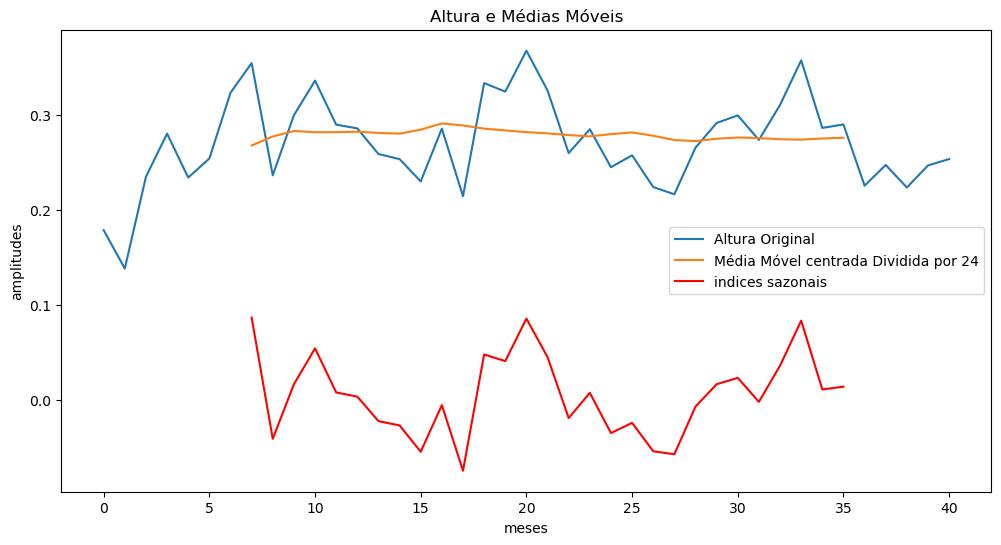

In [21]:
# Plotar as alturas originais
plt.figure(figsize=(12, 6))
# Plotar as alturas originais
plt.plot(df['alt_zero'], label='Altura Original')


plt.plot(df['Media_Movel_Centrada'], label= 'Média Móvel centrada Dividida por 24')
#plt.plot(tendencia, 'k', label='Regressão linear')
# Adicionar rótulos e legendas

plt.plot(df['indices_sazonais'], 'r', label='indices sazonais')
# Adicionar rótulos e legendas
plt.xlabel('meses')
plt.ylabel('amplitudes')
plt.title('Altura e Médias Móveis')
plt.legend()

# Mostrar o gráfico
plt.show()

In [22]:
#filtrar os dados para cada mês toda serie temporal
mensal01 = df['dt_hr'].dt.month

In [23]:
#adicionar acoluna de meses no Dataframe como 'mensal'
df['mensal'] = df['dt_hr'].dt.month

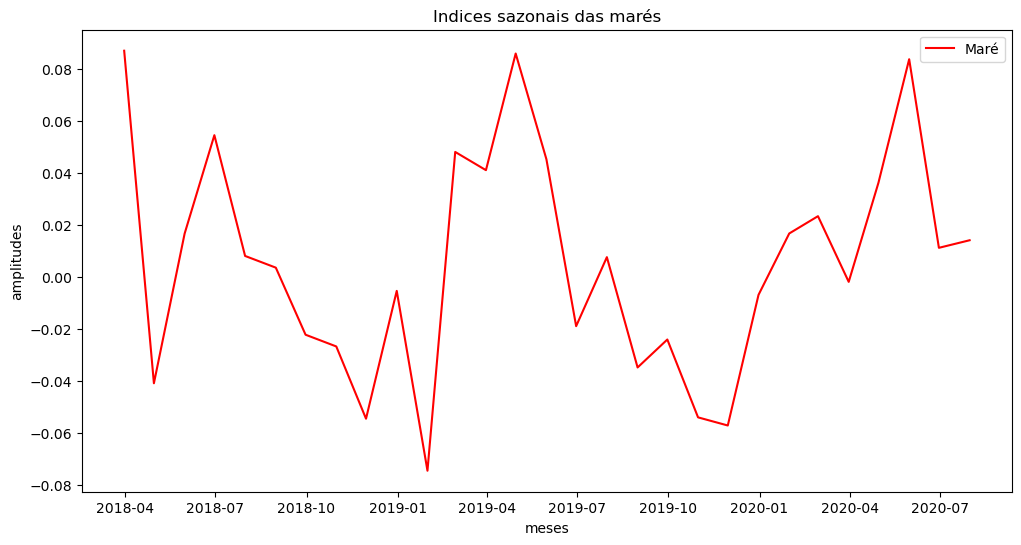

In [24]:
# Plotagem do gráfico
plt.figure(figsize=(12, 6))
plt.plot(df['dt_hr'], df['indices_sazonais'], 'r', label='Maré')
plt.xlabel('meses')
plt.ylabel('amplitudes')
plt.title('Indices sazonais das marés')
plt.legend()

# Mostrar o gráfico
plt.show()

In [25]:
#liste de nomes dos meses 
meses = ['dezembro', 'janeiro', 'fevereiro', 
        'março', 'abril', 'maio',
        'junho', 'julho', 'agosto',
        'setembro', 'outubro', 'novembro']
# dicionário para armazenar os filtros de cada mês
filtros_meses = {}

# loop através dos meses
for mes in range(1, 13):
    #filtrar os dados para incluir apenas o mês atual
    filtros_meses[meses[mes-1]] = df[df['dt_hr'].dt.month == mes]

#dicionário para armazenar as médias dos indices sazonais para cada meês
medias_ind_sazonal = {}
for mes in meses:
    #calcular a media dos índices sazonais para o mês atual
    medias_ind_sazonal[mes] = filtros_meses[mes]['indices_sazonais'].mean()

In [26]:
medias_ind_sazonal

{'dezembro': -0.02896539885916037,
 'janeiro': 0.035606481879431384,
 'fevereiro': 0.04194118617060414,
 'março': 0.026979332486075185,
 'abril': 0.04844177668620653,
 'maio': 0.01550040739089148,
 'junho': 0.009839825215092765,
 'julho': -0.015693698481584237,
 'agosto': -0.023210536561746486,
 'setembro': -0.040420439693469604,
 'outubro': -0.055867419149997516,
 'novembro': -0.006205986237735994}

In [27]:
# Criando o DataFrame
df1 = pd.DataFrame(list(medias_ind_sazonal.items()), columns=['mes_nome', 'media_indice_sazonal'])
df1

,mes_nome,media_indice_sazonal
0,dezembro,-0.028965
1,janeiro,0.035606
2,fevereiro,0.041941
3,março,0.026979
4,abril,0.048442
5,maio,0.015500
6,junho,0.009840
7,julho,-0.015694
8,agosto,-0.023211
9,setembro,-0.040420


In [28]:
#Fazendo a soma, para que dei 0 segundo a definição do modelo adetivo o somatorio das média dos indices sazonais tem que ser igual a zero
soma_md_indices = sum(df1['media_indice_sazonal'])
soma_md_indices

0.007945530844607265

In [29]:
#calcular o excesso
excesso = soma_md_indices/12
excesso

0.0006621275703839387

In [30]:
#indices corrigidos
df1['media_indice_corrigido'] = df1['media_indice_sazonal'] - excesso
df1

,mes_nome,media_indice_sazonal,media_indice_corrigido
0,dezembro,-0.028965,-0.029628
1,janeiro,0.035606,0.034944
2,fevereiro,0.041941,0.041279
3,março,0.026979,0.026317
4,abril,0.048442,0.047780
5,maio,0.015500,0.014838
6,junho,0.009840,0.009178
7,julho,-0.015694,-0.016356
8,agosto,-0.023211,-0.023873
9,setembro,-0.040420,-0.041083


In [31]:
sum(df1['media_indice_corrigido'])

-1.3010426069826053e-17

In [32]:
df1

,mes_nome,media_indice_sazonal,media_indice_corrigido
0,dezembro,-0.028965,-0.029628
1,janeiro,0.035606,0.034944
2,fevereiro,0.041941,0.041279
3,março,0.026979,0.026317
4,abril,0.048442,0.047780
5,maio,0.015500,0.014838
6,junho,0.009840,0.009178
7,julho,-0.015694,-0.016356
8,agosto,-0.023211,-0.023873
9,setembro,-0.040420,-0.041083


In [33]:
import scipy.io as sio
# Salvar o DataFrame em um arquivo .mat
sio.savemat('Arraial.mat', {'Arraial': df1.to_dict(orient='list')})

In [34]:
#df1.to_csv('D:/Sazonalidade/dataframe_sazonalidades/sazonalidade_Arraial_do_cabo.csv', index=False)

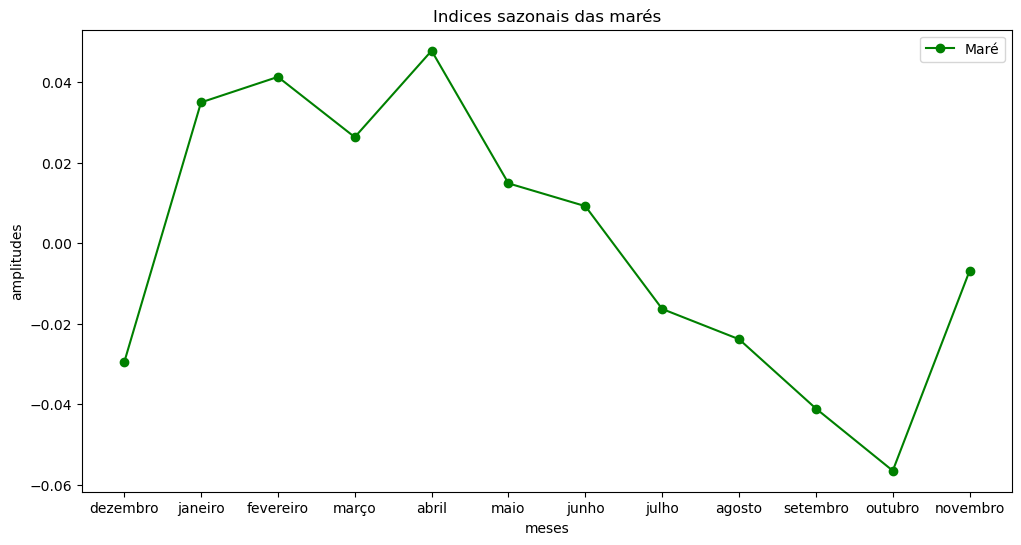

In [35]:
# Plotagem do gráfico
plt.figure(figsize=(12, 6))
plt.plot(df1['mes_nome'], df1['media_indice_corrigido'], marker='o', color='g', label='Maré') 
plt.xlabel('meses')
plt.ylabel('amplitudes')
plt.title('Indices sazonais das marés')
plt.legend()

# Mostrar o gráfico
plt.show()

In [36]:
# Supondo que 'data' seja o nome do seu DataFrame
df['dt_hr'] = pd.to_datetime(df['dt_hr'])

# Criando a nova coluna 'anomes' no formato YYYY-MM
df['anomes'] = df['dt_hr'].dt.strftime('%Y-%m')

In [37]:
# Dicionário para mapear nome do mês para número do mês
meses = {
    'janeiro': 1,
    'fevereiro': 2,
    'março': 3,
    'abril': 4,
    'maio': 5,
    'junho': 6,
    'julho': 7,
    'agosto': 8,
    'setembro': 9,
    'outubro': 10,
    'novembro': 11,
    'dezembro': 12
}

# Mapeando o nome do mês para o número do mês usando o dicionário 'meses'
df1['mes'] = df1['mes_nome'].map(meses)

#ordenando os meses pra ficar bonitinho
df1 = df1.sort_values(by='mes')

In [38]:
#Criando a nova coluna e adcionando a média pra cada respectivo mês do df
df['indices_sazonais'] = df['mensal'].map(df1.set_index('mes')['media_indice_corrigido'])

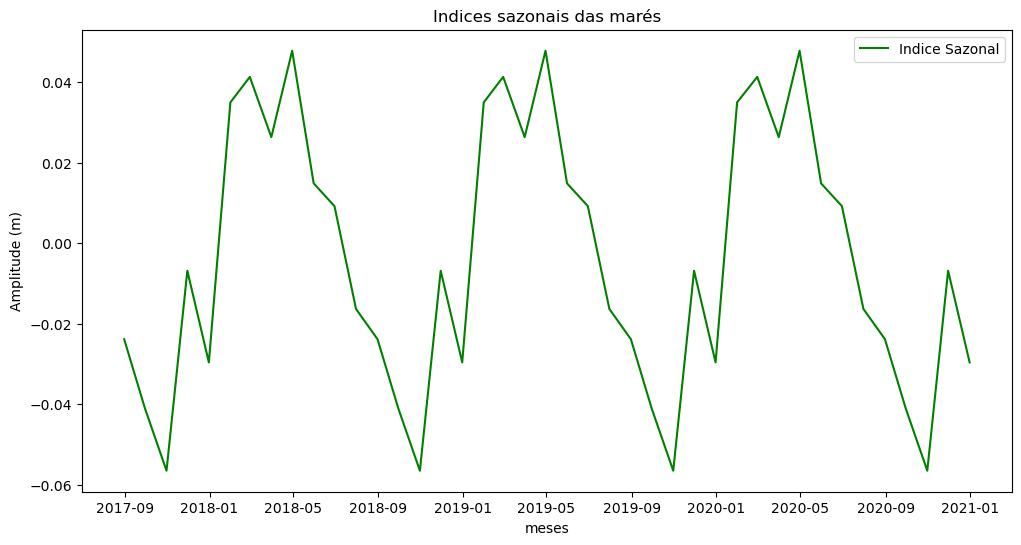

In [39]:
# Plotagem do gráfico
plt.figure(figsize=(12, 6))
plt.plot(df['dt_hr'], df['indices_sazonais'], 'g', label='Indice Sazonal')
plt.xlabel('meses')
plt.ylabel('Amplitude (m)')
plt.title('Indices sazonais das marés')
plt.legend()

# Mostrar o gráfico
plt.show()

In [40]:
# ciclo anual
df['ciclo_anual'] = df['alt_zero'] - alt_est - df['indices_sazonais']

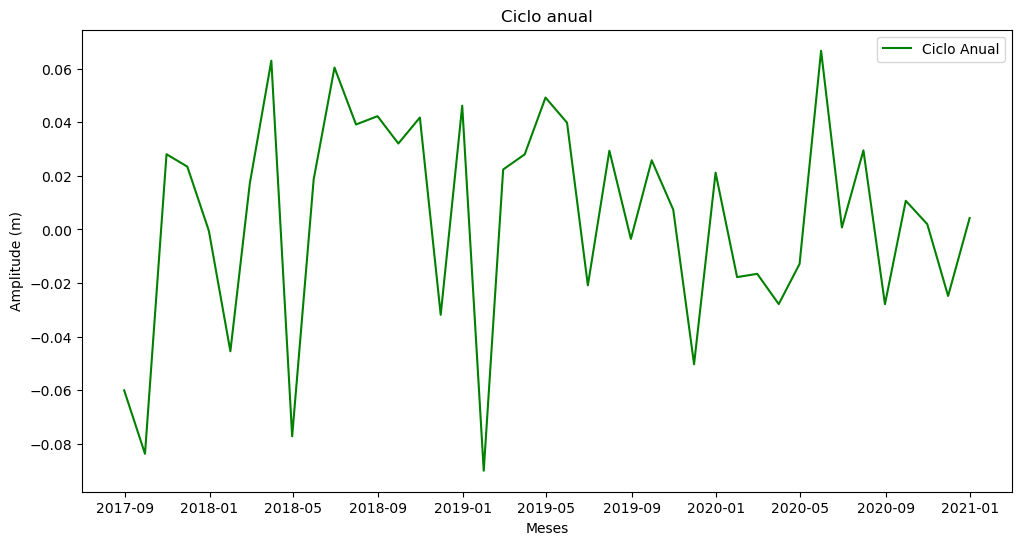

In [41]:
# Plotagem do gráfico
plt.figure(figsize=(12, 6))
plt.plot(df['dt_hr'], df['ciclo_anual'], 'g', label='Ciclo Anual')
plt.xlabel('Meses')
plt.ylabel('Amplitude (m)')
plt.title('Ciclo anual')
plt.legend()

# Mostrar o gráfico
plt.show()

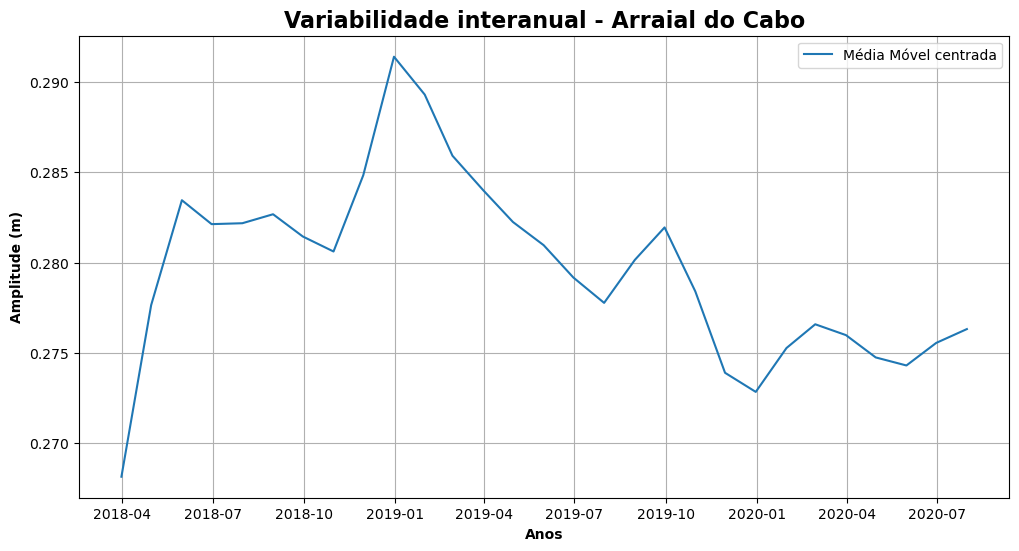

In [42]:
# Plotagem do gráfico
plt.figure(figsize=(12, 6))
plt.plot(df['dt_hr'], df['Media_Movel_Centrada'], label= 'Média Móvel centrada')
plt.grid(True)
plt.xlabel('Anos', fontweight='bold')
plt.ylabel('Amplitude (m)', fontweight='bold')
plt.title('Variabilidade interanual - Arraial do Cabo',fontsize=16, fontweight='bold')
plt.legend()
plt.show()


In [43]:
df.to_csv('D:/Sazonalidade/dataframe_sazonalidades/VARIAÇÃO_INTERNA_Arraial_do_cabo.csv', index=False)